[*********************100%%**********************]  1 of 1 completed
C:\Users\julia\AppData\Local\Temp\ipykernel_11864\297794568.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][data['Close'] > data['SMA']] = 1  # Compra
C

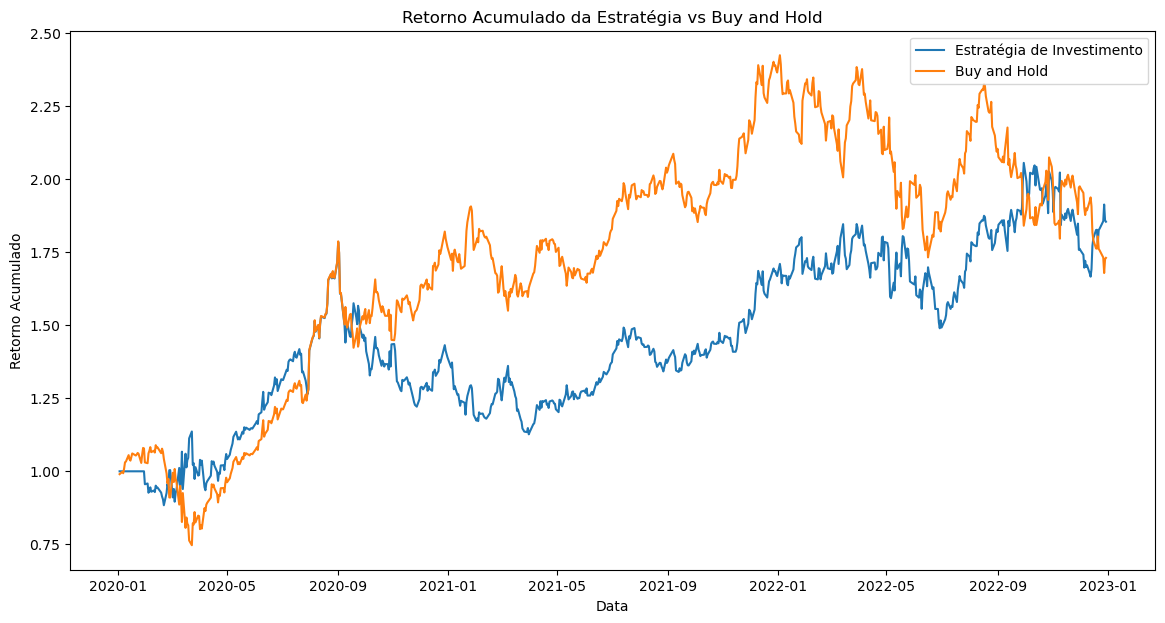

                 Close       SMA  Signal  Position  Cumulative_Return
Date                                                                 
2022-12-23  131.860001  140.6610      -1       0.0           1.830608
2022-12-27  130.029999  139.9515      -1       0.0           1.856014
2022-12-28  126.040001  139.1950      -1       0.0           1.912966
2022-12-29  129.610001  138.2740      -1       0.0           1.858783
2022-12-30  129.929993  137.3550      -1       0.0           1.854194


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Coleta de Dados
def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# 2. Análise Técnica - Média Móvel Simples (SMA)
def calculate_sma(data, window):
    data['SMA'] = data['Close'].rolling(window=window).mean()
    return data

# 3. Estratégia de Investimento
def implement_strategy(data):
    data['Signal'] = 0
    data['Signal'][data['Close'] > data['SMA']] = 1  # Compra
    data['Signal'][data['Close'] < data['SMA']] = -1  # Venda
    data['Position'] = data['Signal'].diff()
    return data

# 4. Backtesting
def backtest(data):
    data['Return'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Return'] * data['Signal'].shift(1)
    data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()
    return data

# 5. Visualização dos Resultados
def plot_results(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Cumulative_Return'], label='Estratégia de Investimento')
    plt.plot((1 + data['Return']).cumprod(), label='Buy and Hold')
    plt.title('Retorno Acumulado da Estratégia vs Buy and Hold')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.legend()
    plt.show()

# Execução do Script
if __name__ == "__main__":
    ticker = 'AAPL'  # Exemplo com a Apple
    start_date = '2020-01-01'
    end_date = '2023-01-01'
    window = 20  # Período da Média Móvel

    data = get_data(ticker, start_date, end_date)
    data = calculate_sma(data, window)
    data = implement_strategy(data)
    data = backtest(data)
    plot_results(data)

    # Exibir os dados finais
    print(data[['Close', 'SMA', 'Signal', 'Position', 'Cumulative_Return']].tail())